<a href="https://colab.research.google.com/github/m-lokeshnaik/classification-of-covid-varients-based-on-protein-sequences/blob/main/encoding%20sequence%20training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install catboost
# !pip install xgboost
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install sklearn
# !pip install seaborn
# !pip install scipy
# !pip install openpyxl
# !pip install BaggingClassifier
# !pip install DecisionTreeClassifier
# !pip install GradientBoostingClassifier
# !pip install RandomForestClassifier
# !pip install SelectKBest
# !pip install mutual_info_classif
# !pip install f_classif
# !pip install chi2

ERROR: Could not find a version that satisfies the requirement BaggingClassifier (from versions: none)
ERROR: No matching distribution found for BaggingClassifier


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif, chi2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


#data loading


In [ ]:
# Load the Excel files
df = pd.read_excel(r"/content/protein sequence for normal.xlsx")

In [ ]:
df.isnull().sum()

,0
Alanine(A),0
Arginine (R),0
Asparagine(N),0
Aspartic acid(D),0
Cysteine (C),0
Glutamine(Q),0
Glutamic acid(E),0
Glycine(G),0
Histidine(H),0
Isoleucine(I),0


In [ ]:
df.head()

,Alanine(A),Arginine (R),Asparagine(N),Aspartic acid(D),Cysteine (C),Glutamine(Q),Glutamic acid(E),Glycine(G),Histidine(H),Isoleucine(I),...,Leucine(K),Methionine(M),Phenylalanine(F),Proline(P),Serine(S),Threonine(T),Tryptophan(W),Tyrosine(Y),Valine(V),class labels
0,24,27,25,24,2,28,19,34,10,14,...,28,4,23,32,52,27,5,16,19,HCoV-HKU1
1,10,8,11,7,3,5,3,11,2,21,...,12,8,21,7,16,18,6,10,19,HCoV-HKU1
2,9,10,32,21,15,6,5,19,9,28,...,18,2,39,17,42,10,4,33,24,HCoV-HKU1
3,24,27,25,24,2,28,19,34,10,14,...,28,4,23,32,52,27,5,16,19,HCoV-HKU1
4,10,8,11,7,3,5,3,11,2,21,...,12,8,21,7,16,18,6,10,19,HCoV-HKU1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame
scaler = MinMaxScaler()

# Select numerical columns (excluding 'class labels')
numerical_cols = df.columns[:-1]

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df)

     Alanine(A)  Arginine (R)  Asparagine(N)  Aspartic acid(D)  Cysteine (C)  \
0        0.2875      0.254902       0.261364          0.366667         0.050   
1        0.1125      0.068627       0.102273          0.083333         0.075   
2        0.1000      0.088235       0.340909          0.316667         0.375   
3        0.2875      0.254902       0.261364          0.366667         0.050   
4        0.1125      0.068627       0.102273          0.083333         0.075   
..          ...           ...            ...               ...           ...   
795      0.4500      0.215686       0.170455          0.400000         0.075   
796      0.3125      0.303922       0.511364          0.400000         0.375   
797      0.6000      0.343137       0.056818          0.350000         0.275   
798      0.1375      0.107843       0.068182          0.383333         0.025   
799      0.2250      0.235294       0.215909          0.316667         0.175   

     Glutamine(Q)  Glutamic acid(E)  Gl

In [ ]:
# Separate features and labels
X = df.drop(columns=['class labels'])
y = df['class labels']
print(X)
print(y)

     Alanine(A)  Arginine (R)  Asparagine(N)  Aspartic acid(D)  Cysteine (C)  \
0        0.2875      0.254902       0.261364          0.366667         0.050   
1        0.1125      0.068627       0.102273          0.083333         0.075   
2        0.1000      0.088235       0.340909          0.316667         0.375   
3        0.2875      0.254902       0.261364          0.366667         0.050   
4        0.1125      0.068627       0.102273          0.083333         0.075   
..          ...           ...            ...               ...           ...   
795      0.4500      0.215686       0.170455          0.400000         0.075   
796      0.3125      0.303922       0.511364          0.400000         0.375   
797      0.6000      0.343137       0.056818          0.350000         0.275   
798      0.1375      0.107843       0.068182          0.383333         0.025   
799      0.2250      0.235294       0.215909          0.316667         0.175   

     Glutamine(Q)  Glutamic acid(E)  Gl

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [ ]:
# Apply feature selection methods
def select_features(X, y, method, k=10):
    if method == 'IG':
        selector = SelectKBest(score_func=mutual_info_classif, k=k)
    elif method == 'ANOVA':
        selector = SelectKBest(score_func=f_classif, k=k)
    elif method == 'Chi2':
        X = X.apply(np.int64)  # Chi2 requires non-negative values
        selector = SelectKBest(score_func=chi2, k=k)
    elif method == 'MI':
        # Mutual Information
        selector = SelectKBest(score_func=mutual_info_classif, k=k)
    else:
        raise ValueError("Unknown method: {}".format(method))

    X_new = selector.fit_transform(X, y)
    selected_features = selector.get_support(indices=True)
    feature_names = X.columns[selected_features]
    return X_new, selected_features, feature_names, selector


In [ ]:
# Select top 10 features using each method
X_ig, selected_features_ig, feature_names_ig, _ = select_features(X, y, method='IG', k=10)
X_anova, selected_features_anova, feature_names_anova, _ = select_features(X, y, method='ANOVA', k=10)
X_chi2, selected_features_chi2, feature_names_chi2, _ = select_features(X, y, method='Chi2', k=10)
X_mi, selected_features_mi, feature_names_mi, _ = select_features(X, y, method='MI', k=10)

In [ ]:

# Define classifiers
classifiers = {
    'BE': BaggingClassifier(),
    'DT': DecisionTreeClassifier(),
    'GB': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'RF': RandomForestClassifier(),
    'SVM': SVC(),
    "catboost": CatBoostClassifier(),
    "xgboost": XGBClassifier()
}

In [ ]:
# Function to evaluate classifiers
def evaluate_classifiers(X, y, classifiers):
    results = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)

        # Handle multiclass confusion matrix
        specificity = []
        for i in range(cm.shape[0]):
            tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
            fp = np.sum(cm[:, i]) - cm[i, i]
            specificity.append(tn / (tn + fp) if (tn + fp) != 0 else 0)  # Handle potential division by zero

        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Sensitivity': recall,
            'Specificity': np.mean(specificity)  # Report average specificity
        }

    return results

In [ ]:
# Evaluate classifiers using features selected by Information Gain
results_ig = evaluate_classifiers(X_ig, y, classifiers)
# Evaluate classifiers using features selected by ANOVA
results_anova = evaluate_classifiers(X_anova, y, classifiers)
# Evaluate classifiers using features selected by Chi2
results_chi2 = evaluate_classifiers(X_chi2, y, classifiers)
# Evaluate classifiers using features selected by Mutual Information
results_mi = evaluate_classifiers(X_mi, y, classifiers)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning rate set to 0.077346
0:	learn: 1.8051849	total: 53.9ms	remaining: 53.8s
1:	learn: 1.5915782	total: 65.1ms	remaining: 32.5s
2:	learn: 1.4293581	total: 73.4ms	remaining: 24.4s
3:	learn: 1.3077661	total: 92.3ms	remaining: 23s
4:	learn: 1.1999246	total: 99.5ms	remaining: 19.8s
5:	learn: 1.1092909	total: 109ms	remaining: 18s
6:	learn: 1.0265051	total: 119ms	remaining: 16.9s
7:	learn: 0.9510437	total: 129ms	remaining: 16s
8:	learn: 0.8931864	total: 137ms	remaining: 15.1s
9:	learn: 0.8409744	total: 160ms	remaining: 15.8s
10:	learn: 0.7887129	total: 167ms	remaining: 15s
11:	learn: 0.7423037	total: 175ms	remaining: 14.4s
12:	learn: 0.6986970	total: 188ms	remaining: 14.3s
13:	learn: 0.6590146	total: 196ms	remaining: 13.8s
14:	learn: 0.6256694	total: 206ms	remaining: 13.5s
15:	learn: 0.5883019	total: 215ms	remaining: 13.2s
16:	learn: 0.5602251	total: 223ms	remaining: 12.9s
17:	learn: 0.5318461	total: 231ms	remaining: 12.6s
18:	learn: 0.5058412	total: 245ms	remaining: 12.6s
19:	learn: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning rate set to 0.077346
0:	learn: 1.8184605	total: 5.43ms	remaining: 5.43s
1:	learn: 1.6188381	total: 8.97ms	remaining: 4.48s
2:	learn: 1.4816859	total: 12.4ms	remaining: 4.11s
3:	learn: 1.3574147	total: 15.6ms	remaining: 3.88s
4:	learn: 1.2470341	total: 18.9ms	remaining: 3.77s
5:	learn: 1.1578425	total: 22.3ms	remaining: 3.69s
6:	learn: 1.0657742	total: 25.7ms	remaining: 3.65s
7:	learn: 0.9976515	total: 29ms	remaining: 3.59s
8:	learn: 0.9305782	total: 32.5ms	remaining: 3.58s
9:	learn: 0.8707680	total: 36ms	remaining: 3.57s
10:	learn: 0.8191238	total: 39.5ms	remaining: 3.55s
11:	learn: 0.7704027	total: 42.8ms	remaining: 3.52s
12:	learn: 0.7223767	total: 46.1ms	remaining: 3.5s
13:	learn: 0.6855770	total: 49.5ms	remaining: 3.49s
14:	learn: 0.6502793	total: 52.7ms	remaining: 3.46s
15:	learn: 0.6177208	total: 56ms	remaining: 3.44s
16:	learn: 0.5986112	total: 59.3ms	remaining: 3.43s
17:	learn: 0.5754428	total: 64.9ms	remaining: 3.54s
18:	learn: 0.5483066	total: 73.1ms	remaining: 3.77s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning

Learning rate set to 0.077346
0:	learn: 1.9459628	total: 5.19ms	remaining: 5.19s
1:	learn: 1.8479074	total: 9.19ms	remaining: 4.59s
2:	learn: 1.7620653	total: 13.7ms	remaining: 4.55s
3:	learn: 1.6900929	total: 15.4ms	remaining: 3.84s
4:	learn: 1.6245092	total: 20.2ms	remaining: 4.01s
5:	learn: 1.5688392	total: 22.1ms	remaining: 3.65s
6:	learn: 1.5217179	total: 23.8ms	remaining: 3.38s
7:	learn: 1.4762836	total: 28.6ms	remaining: 3.55s
8:	learn: 1.4368569	total: 33.2ms	remaining: 3.66s
9:	learn: 1.4038973	total: 35ms	remaining: 3.47s
10:	learn: 1.3743980	total: 36.7ms	remaining: 3.3s
11:	learn: 1.3447755	total: 39.5ms	remaining: 3.25s
12:	learn: 1.3188275	total: 44.1ms	remaining: 3.35s
13:	learn: 1.2956594	total: 45.9ms	remaining: 3.23s
14:	learn: 1.2737849	total: 50.5ms	remaining: 3.32s
15:	learn: 1.2546033	total: 55.1ms	remaining: 3.39s
16:	learn: 1.2375762	total: 59.8ms	remaining: 3.46s
17:	learn: 1.2308483	total: 61.6ms	remaining: 3.36s
18:	learn: 1.2158260	total: 66.8ms	remaining: 3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning rate set to 0.077346
0:	learn: 1.7756766	total: 3.91ms	remaining: 3.91s
1:	learn: 1.5837883	total: 7.38ms	remaining: 3.68s
2:	learn: 1.4254993	total: 10.8ms	remaining: 3.58s
3:	learn: 1.2936941	total: 14.1ms	remaining: 3.5s
4:	learn: 1.1864800	total: 17.3ms	remaining: 3.44s
5:	learn: 1.1027643	total: 20.4ms	remaining: 3.37s
6:	learn: 1.0203621	total: 23.7ms	remaining: 3.36s
7:	learn: 0.9507877	total: 27.1ms	remaining: 3.36s
8:	learn: 0.8772662	total: 31.3ms	remaining: 3.44s
9:	learn: 0.8167187	total: 35.2ms	remaining: 3.48s
10:	learn: 0.7679323	total: 38.6ms	remaining: 3.47s
11:	learn: 0.7264730	total: 42ms	remaining: 3.45s
12:	learn: 0.6828388	total: 45.4ms	remaining: 3.44s
13:	learn: 0.6485665	total: 48.7ms	remaining: 3.43s
14:	learn: 0.6128872	total: 52.1ms	remaining: 3.42s
15:	learn: 0.5773054	total: 55.2ms	remaining: 3.4s
16:	learn: 0.5505523	total: 58.7ms	remaining: 3.39s
17:	learn: 0.5200785	total: 62ms	remaining: 3.38s
18:	learn: 0.4941625	total: 65.5ms	remaining: 3.38

In [ ]:
# Combine results into a single DataFrame
results = {
    'IG': results_ig,
    'ANOVA': results_anova,
    'Chi2': results_chi2,
    'MI': results_mi
}
results_df = pd.DataFrame.from_dict({(method, clf): metrics
                                     for method, method_results in results.items()
                                     for clf, metrics in method_results.items()}, orient='index')
print(results_df)

                Accuracy  Precision  Sensitivity  Specificity
IG    BE         0.96875   0.969351      0.96875     0.995480
      DT         0.95625   0.960787      0.95625     0.993786
      GB         0.96875   0.971917      0.96875     0.995562
      KNN        0.95625   0.962882      0.95625     0.993841
      RF         0.98125   0.982645      0.98125     0.997380
      SVM        0.50000   0.436718      0.50000     0.931511
      catboost   0.98125   0.984766      0.98125     0.997449
      xgboost    0.98125   0.984766      0.98125     0.997449
ANOVA BE         0.96875   0.968932      0.96875     0.995418
      DT         0.94375   0.947724      0.94375     0.991954
      GB         0.98750   0.988207      0.98750     0.998237
      KNN        0.96250   0.962403      0.96250     0.994574
      RF         0.98125   0.981499      0.98125     0.997256
      SVM        0.38750   0.332125      0.38750     0.916392
      catboost   0.98750   0.988500      0.98750     0.998175
      xg

In [ ]:
# Display results
for method, method_results in results.items():
    print(f'{method}:')
    for clf_name, metrics in method_results.items():
        print(f'  {clf_name}: {metrics["Accuracy"]:.2f}') # Access the 'Accuracy' value within the nested dictionary

IG:
  BE: 0.97
  DT: 0.96
  GB: 0.97
  KNN: 0.96
  RF: 0.98
  SVM: 0.50
  catboost: 0.98
  xgboost: 0.98
ANOVA:
  BE: 0.97
  DT: 0.94
  GB: 0.99
  KNN: 0.96
  RF: 0.98
  SVM: 0.39
  catboost: 0.99
  xgboost: 0.98
Chi2:
  BE: 0.39
  DT: 0.39
  GB: 0.39
  KNN: 0.46
  RF: 0.39
  SVM: 0.39
  catboost: 0.39
  xgboost: 0.39
MI:
  BE: 0.96
  DT: 0.97
  GB: 0.97
  KNN: 0.95
  RF: 0.97
  SVM: 0.45
  catboost: 0.98
  xgboost: 0.97


In [ ]:
# Sort amino acids alphabetically
sorted_amino_acids = sorted(amino_acid_counts.index)
sorted_counts = [amino_acid_counts[aa] for aa in sorted_amino_acids]

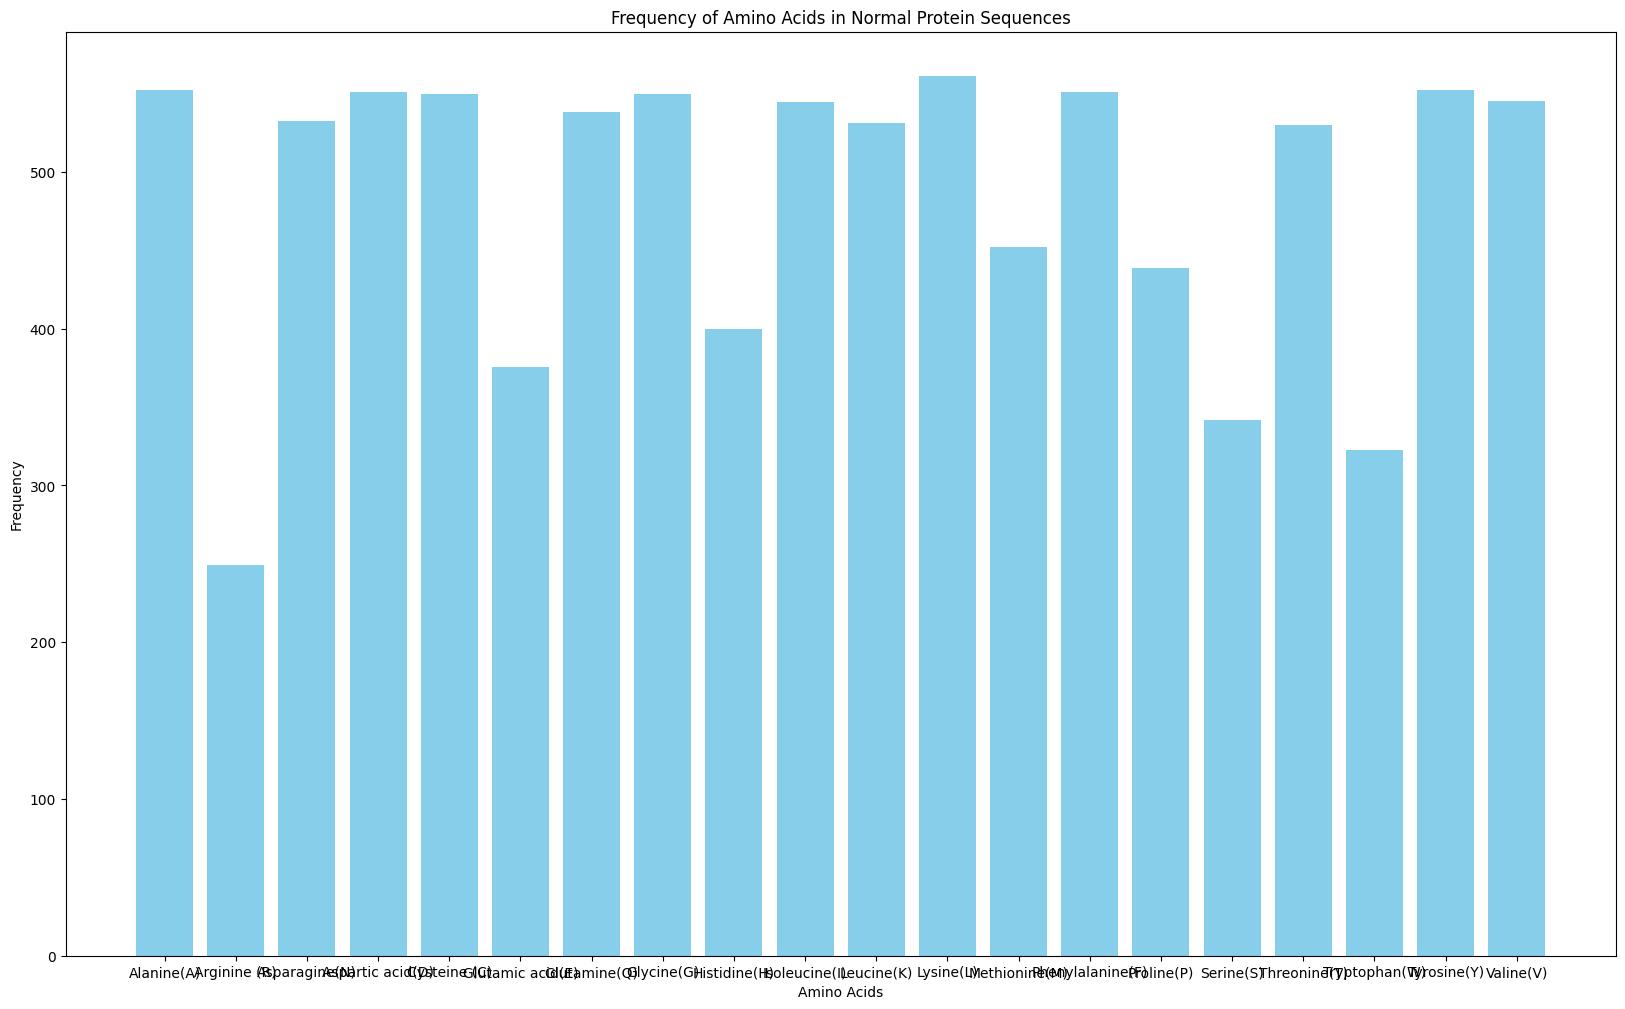

In [ ]:
# Plotting the bar plot
plt.figure(figsize=(20, 12))
plt.bar(sorted_amino_acids, sorted_counts, color='skyblue')
plt.xlabel('Amino Acids')
plt.ylabel('Frequency')
plt.title('Frequency of Amino Acids in Normal Protein Sequences')
plt.show()